# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering, DBSCAN

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
df = pd.read_csv('Dataset_clustering.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       4000 non-null   object 
 1   Customer_ID    4000 non-null   object 
 2   Customer_Type  4000 non-null   object 
 3   Product        4000 non-null   object 
 4   Category       4000 non-null   object 
 5   Unit_Price     4000 non-null   float64
 6   Quantity       4000 non-null   int64  
 7   Discount       4000 non-null   float64
 8   Total_Price    4000 non-null   float64
 9   Region         4000 non-null   object 
 10  Order_Date     4000 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 343.9+ KB


In [4]:
df.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1663596,CUS5073,B2B,Hohes C Orange,Juices,1.87,74,0.10,124.54,Niedersachsen,2023-11-29
1,ORD1999010,CUS141,B2B,Fritz-Kola,Soft Drinks,1.87,18,0.05,31.98,Bremen,2021-05-13
2,ORD347756,CUS562,B2B,Merlot,Alcoholic Beverages,12.04,71,0.15,726.61,Thüringen,2021-04-21
3,ORD600360,CUS7718,B2B,Moët & Chandon,Alcoholic Beverages,64.91,91,0.10,5316.13,Hamburg,2021-08-23
4,ORD2300591,CUS6160,B2C,Granini Apple,Juices,1.64,4,0.00,6.56,Sachsen,2022-10-16


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## **Data Structure**

In [5]:
# 1. Struktur Data
print(f"Dataset memiliki {df.shape[0]} baris dan {df.shape[1]} kolom.")
print("-----------------------------------------------------")
df.info()

Dataset memiliki 4000 baris dan 11 kolom.
-----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       4000 non-null   object 
 1   Customer_ID    4000 non-null   object 
 2   Customer_Type  4000 non-null   object 
 3   Product        4000 non-null   object 
 4   Category       4000 non-null   object 
 5   Unit_Price     4000 non-null   float64
 6   Quantity       4000 non-null   int64  
 7   Discount       4000 non-null   float64
 8   Total_Price    4000 non-null   float64
 9   Region         4000 non-null   object 
 10  Order_Date     4000 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 343.9+ KB


Bisa dilihat dari `df.info()` diatas dataset memiliki `4000 baris` & `11 kolom`

1. Numerikal: `Unit_Price`, `Quantity`, `Discount`, `Total_Price`
2. Kategorikal: `Order_ID`, `Customer_ID`, `Customer_Type`, `Product`, `Category`, `Region`, `Order_Date`

## **Check Missing Values**

In [6]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})

missing_data

,Missing Values,Percentage (%)
Order_ID,0,0.0
Customer_ID,0,0.0
Customer_Type,0,0.0
Product,0,0.0
Category,0,0.0
Unit_Price,0,0.0
Quantity,0,0.0
Discount,0,0.0
Total_Price,0,0.0
Region,0,0.0


Berdasarkan hasil pengecekan, **dataset ini tidak memiliki nilai yang hilang** di setiap kolom. Setiap kolom memiliki **4,000 non-null values**, sehingga tidak diperlukan penanganan khusus untuk missing values.

## **Analisis Distribusi dan Korelasi**

### Statistik Deskriptif

In [7]:
df.describe()

,Unit_Price,Quantity,Discount,Total_Price
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,5.945703,22.435250,0.028750,135.505937
std,15.464116,26.639646,0.044415,533.979100
min,0.330000,1.000000,0.000000,0.460000
25%,1.040000,6.000000,0.000000,8.157500
50%,1.720000,11.000000,0.000000,20.025000
75%,3.120000,26.000000,0.050000,68.055000
max,129.240000,100.000000,0.150000,10111.960000


In [8]:
numeric_cols = ['Unit_Price', 'Quantity', 'Discount', 'Total_Price']
df_numeric = df[numeric_cols]

### Distribusi Variabel Numerik

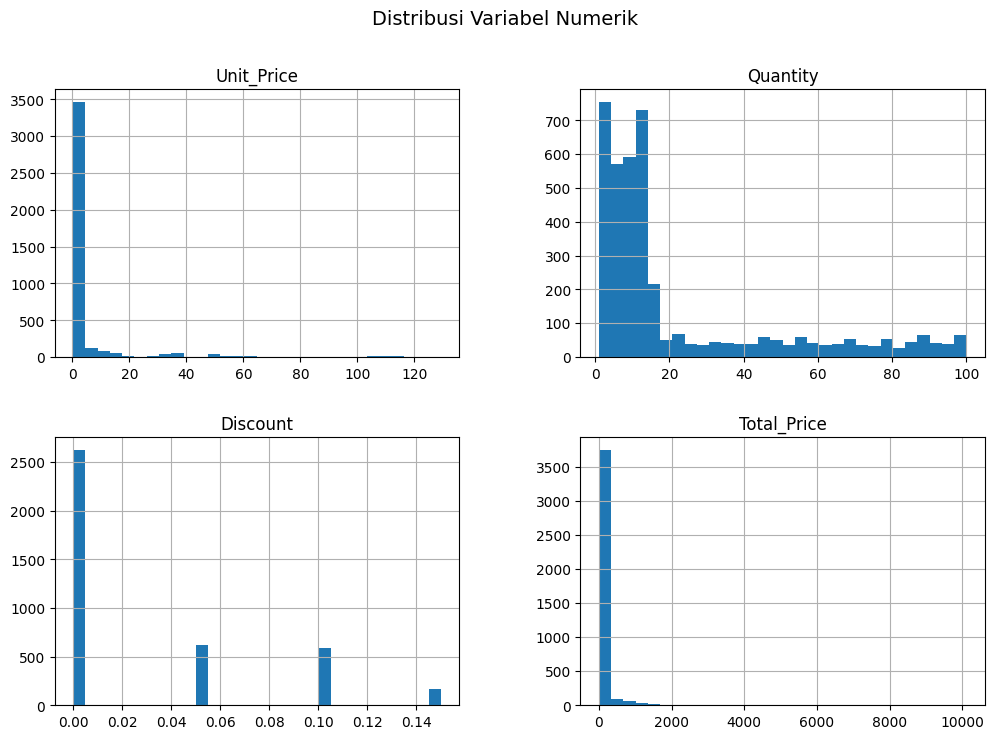

In [9]:
df.hist(figsize=(12, 8), bins=30)
plt.suptitle("Distribusi Variabel Numerik", fontsize=14)
plt.show()

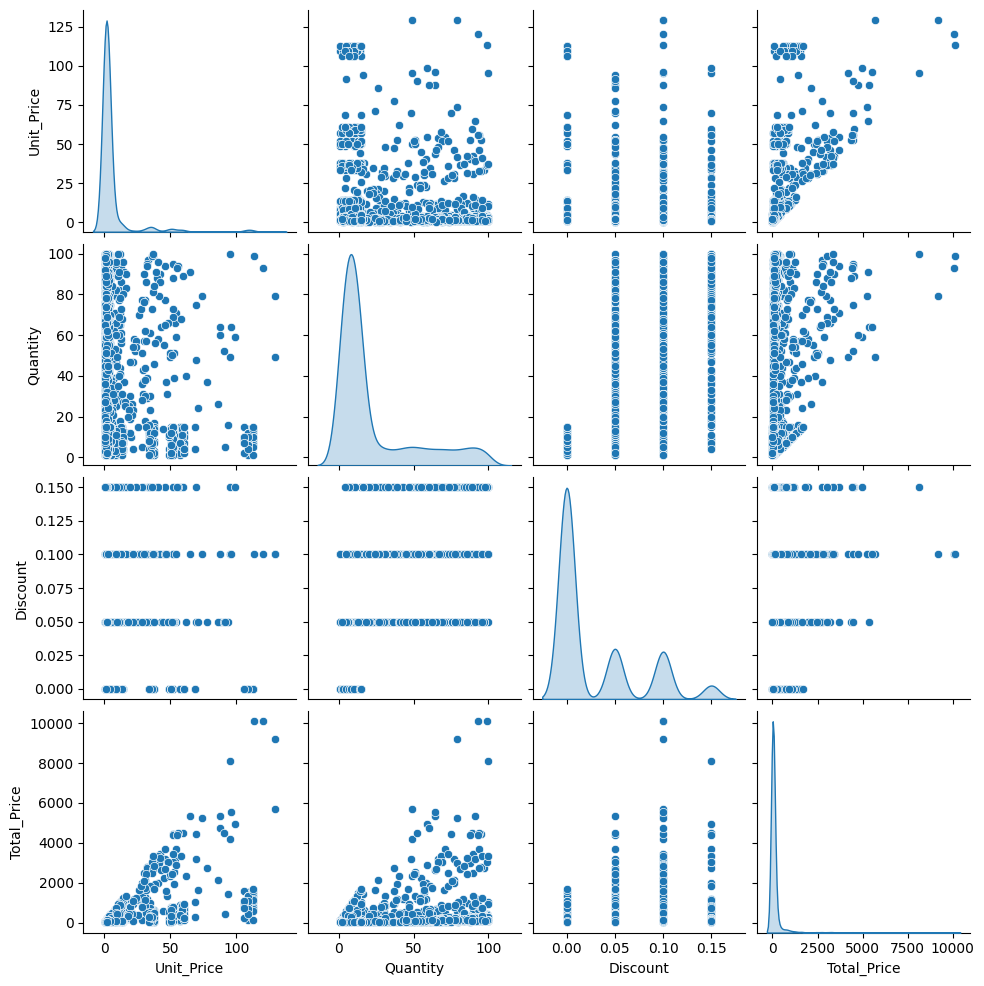

In [10]:
## 2️⃣ Pairplot untuk melihat pola antar variabel
sns.pairplot(df_numeric, diag_kind='kde')
plt.show()

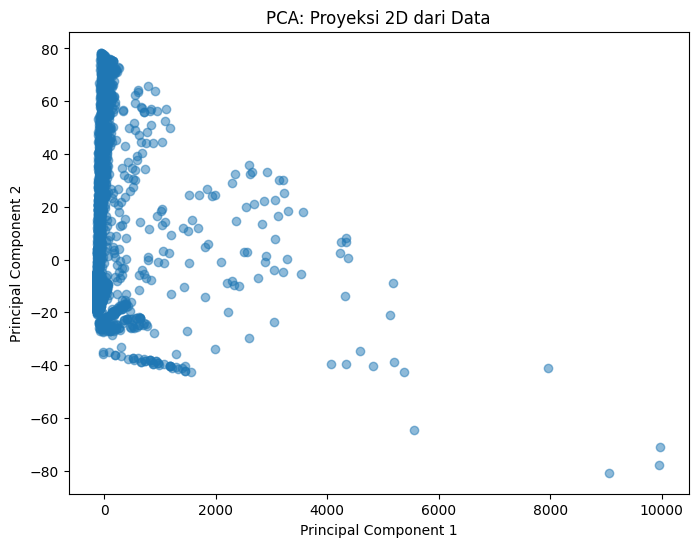

In [11]:
## 3️⃣ PCA untuk Reduksi Dimensi
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_numeric)

plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA: Proyeksi 2D dari Data")
plt.show()

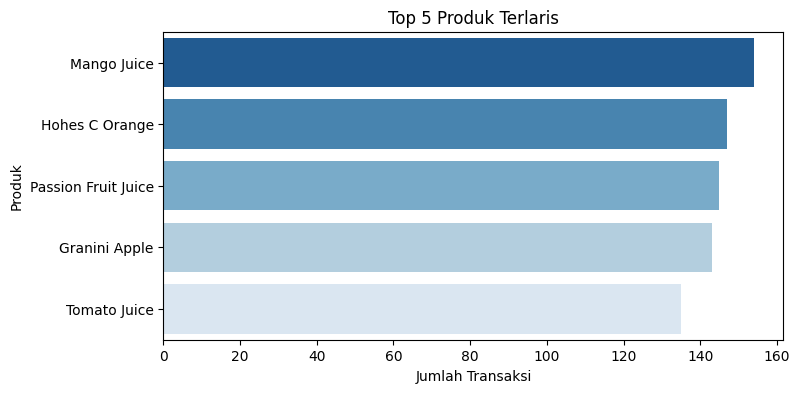

In [12]:
top_products = df['Product'].value_counts().head(5)

plt.figure(figsize=(8, 4))
sns.barplot(x=top_products.values, y=top_products.index, hue=top_products.index, palette="Blues_r", legend=False)
plt.xlabel("Jumlah Transaksi")
plt.ylabel("Produk")
plt.title("Top 5 Produk Terlaris")
plt.show()

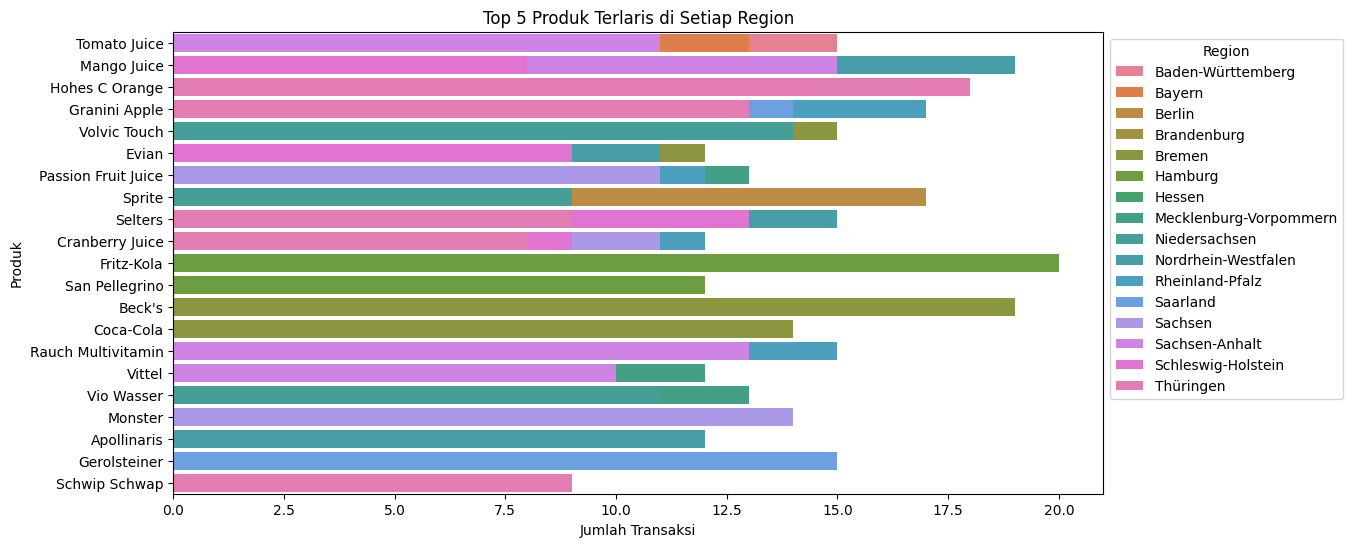

In [13]:
# Top 5 Produk per Region
top_products_per_region = df.groupby("Region")["Product"].value_counts().groupby(level=0).head(5).reset_index(name="Count")

plt.figure(figsize=(12, 6))
sns.barplot(x="Count", y="Product", hue="Region", data=top_products_per_region, dodge=False)
plt.xlabel("Jumlah Transaksi")
plt.ylabel("Produk")
plt.title("Top 5 Produk Terlaris di Setiap Region")
plt.legend(title="Region", bbox_to_anchor=(1, 1))
plt.show()

### Heatmap Correlation

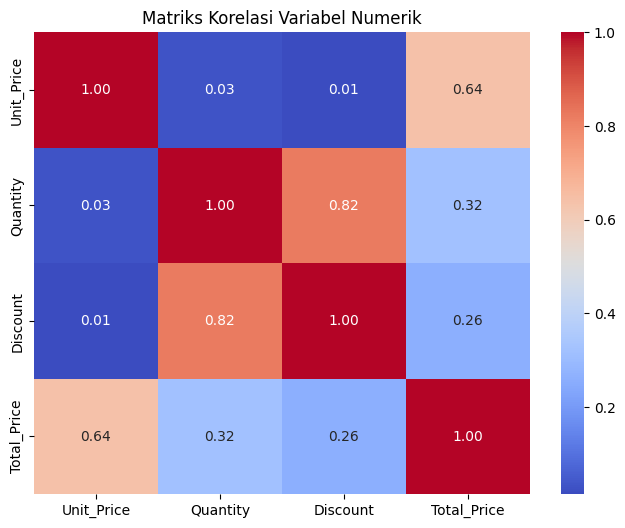

In [14]:
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi Variabel Numerik")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

## **Handling Missing Values**

In [15]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})

missing_data

,Missing Values,Percentage (%)
Order_ID,0,0.0
Customer_ID,0,0.0
Customer_Type,0,0.0
Product,0,0.0
Category,0,0.0
Unit_Price,0,0.0
Quantity,0,0.0
Discount,0,0.0
Total_Price,0,0.0
Region,0,0.0


Dikarenakan sudah tidak ada missing values makan step ini saya skip dan melanjutkan ke step selanjutnya 

## **Handling Duplicates Data**

In [16]:
duplicate_count = df.duplicated().sum()
print(f"Jumlah data duplikat: {duplicate_count}")

Jumlah data duplikat: 0


Bisa dilihat juga, tidak mempunyai data duplicated, selanjutnya adalah melakukan normalisasi atau standarisasi feature

## **Normalisasi atau Standarisasi Fitur**

In [17]:
num_features = ['Unit_Price', 'Quantity', 'Discount', 'Total_Price']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[num_features])
df_scaled = pd.DataFrame(df_scaled, columns=num_features)

df_scaled.describe()

,Unit_Price,Quantity,Discount,Total_Price
count,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03
mean,-2.486900e-17,2.131628e-17,1.953993e-17,2.220446e-17
std,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00
min,-3.631895e-01,-8.047378e-01,-6.473867e-01,-2.529365e-01
25%,-3.172710e-01,-6.170242e-01,-6.473867e-01,-2.385194e-01
50%,-2.732927e-01,-4.293105e-01,-6.473867e-01,-2.162919e-01
75%,-1.827493e-01,1.338304e-01,4.785032e-01,-1.263334e-01
max,7.973926e+00,2.911992e+00,2.730283e+00,1.868557e+01


## **Encode Data Categorical**

Cek terlebih dahulu seberapa banyak jenis kategori yang ada untuk menentukan cara encodingnya menggunakan apa

In [18]:
cat_columns = ['Customer_Type', 'Product', 'Category', 'Region']

for col in cat_columns:
    print(f"{col}: {df[col].nunique()} kategori unik")
    print(df[col].unique()[:10])
    print("-" * 50)

Customer_Type: 2 kategori unik
['B2B' 'B2C']
--------------------------------------------------
Product: 47 kategori unik
['Hohes C Orange' 'Fritz-Kola' 'Merlot' 'Moët & Chandon' 'Granini Apple'
 'Riesling' 'Pepsi' 'Havana Club' 'Vio Wasser' 'Schwip Schwap']
--------------------------------------------------
Category: 4 kategori unik
['Juices' 'Soft Drinks' 'Alcoholic Beverages' 'Water']
--------------------------------------------------
Region: 16 kategori unik
['Niedersachsen' 'Bremen' 'Thüringen' 'Hamburg' 'Sachsen' 'Bayern'
 'Saarland' 'Brandenburg' 'Nordrhein-Westfalen' 'Baden-Württemberg']
--------------------------------------------------


In [19]:
df_encoded = pd.get_dummies(df, columns=['Customer_Type', 'Category'], drop_first=True)

Untuk fitur dengan jumlah kategori yang sedikit, seperti Customer_Type (2 kategori) dan Category (4 kategori), One-Hot Encoding (OHE) digunakan. Metode ini mengubah kategori menjadi representasi biner tanpa memberikan bobot lebih pada kategori tertentu. Dengan drop_first=True, salah satu kategori dihapus untuk menghindari dummy variable trap, sehingga dataset tetap ringkas tanpa kehilangan informasi.

In [20]:
for col in ['Product', 'Region']:
    freq_map = df[col].value_counts(normalize=True)
    df_encoded[col + '_FreqEnc'] = df[col].map(freq_map)

Sementara itu, untuk fitur dengan jumlah kategori yang banyak, seperti `Product (47 kategori)` dan `Region (16 kategori)`, digunakan **`Frequency Encoding`**. Jika OHE diterapkan pada fitur ini, jumlah kolom akan bertambah secara signifikan, yang dapat memperlambat proses analisis dan meningkatkan kompleksitas komputasi. Oleh karena itu, setiap kategori dalam fitur ini dikonversi menjadi nilai numerik berdasarkan proporsi kemunculannya dalam dataset. Dengan cara ini, model dapat tetap mengenali hubungan antar kategori tanpa menambah dimensi dataset secara drastis.

## **Binning**

In [21]:
df_encoded['Quantity_Bin'] = pd.qcut(df_encoded['Quantity'], q=3, labels=['Low', 'Medium', 'High'])

Pada fitur `Quantity (jumlah produk terjual)`, nilainya memiliki rentang yang cukup luas, dari 1 hingga 100 unit. Jika digunakan secara langsung dalam model, skala yang besar ini bisa menyebabkan hasil clustering yang kurang optimal. Oleh karena itu, nilai Quantity dikelompokkan menjadi tiga kategori berdasarkan kuantilnya: `Low (rendah)`, `Medium (sedang)`, dan `High (tinggi)`. Dengan cara ini, model dapat lebih mudah mengenali pola pelanggan berdasarkan seberapa banyak produk yang mereka beli dalam satu transaksi.

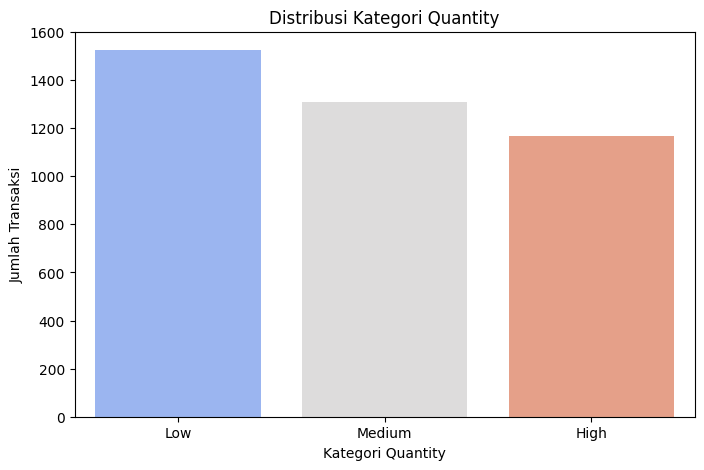

In [22]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Quantity_Bin', data=df_encoded, hue='Quantity_Bin', palette="coolwarm", legend=False, order=['Low', 'Medium', 'High'])
plt.title("Distribusi Kategori Quantity")
plt.xlabel("Kategori Quantity")
plt.ylabel("Jumlah Transaksi")
plt.show()

In [23]:
df_encoded['TotalPrice_Bin'] = pd.qcut(df_encoded['Total_Price'], q=3, labels=['Low', 'Medium', 'High'])

Sementara itu, fitur `Total_Price (harga total transaksi)` juga memiliki variasi yang besar, dengan perbedaan signifikan antara transaksi kecil dan besar. Untuk mengatasi perbedaan ini, `Total_Price` dibagi ke dalam tiga kategori dengan cara yang sama, yaitu `Low Spend` (pengeluaran rendah), `Medium Spend` (pengeluaran sedang), dan `High Spend` (pengeluaran tinggi). Kategori ini membantu memahami perilaku pelanggan dalam berbelanja, apakah mereka lebih sering melakukan transaksi kecil, menengah, atau besar.

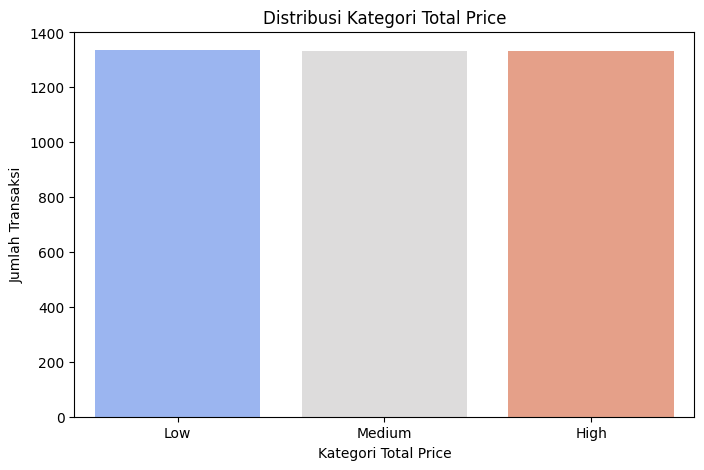

In [24]:
plt.figure(figsize=(8, 5))
sns.countplot(x='TotalPrice_Bin', data=df_encoded, hue='TotalPrice_Bin', palette="coolwarm", legend=False, order=['Low', 'Medium', 'High'])
plt.title("Distribusi Kategori Total Price")
plt.xlabel("Kategori Total Price")
plt.ylabel("Jumlah Transaksi")
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

### **K-Means**

In [25]:
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_encoded['Cluster'] = kmeans.fit_predict(df_scaled)

# Lihat jumlah data per klaster
df_encoded['Cluster'].value_counts()

Cluster
1    2834
0     921
3     186
2      59
Name: count, dtype: int64

Memilih K-Means karena memberikan hasil yang cepat dan efisien, serta mudah diinterpretasikan. Hasil clustering membantu dalam menentukan strategi pemasaran, segmentasi pasar, dan promosi yang lebih tepat sasaran, seperti menawarkan diskon untuk produk premium atau mengidentifikasi produk yang kurang diminati.

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

### **Elbow Method**

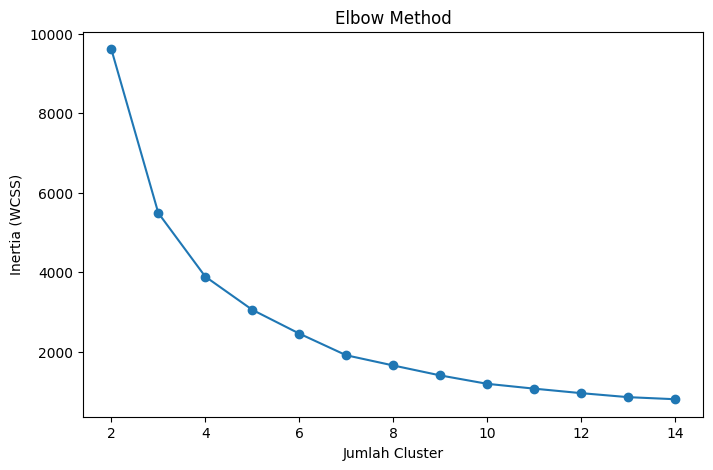

In [26]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Uji berbagai jumlah cluster (misalnya 2 hingga 15)
inertia = []
K_range = range(2, 15)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Visualisasi Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method')
plt.show()

### **Silhouette Score**

In [27]:
from sklearn.metrics import silhouette_score

# Coba berbagai jumlah cluster dan hitung silhouette score
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, cluster_labels)
    print(f"K = {k} → Silhouette Score: {score:.4f}")

K = 2 → Silhouette Score: 0.6434
K = 3 → Silhouette Score: 0.6734
K = 4 → Silhouette Score: 0.6975
K = 5 → Silhouette Score: 0.6598
K = 6 → Silhouette Score: 0.6719
K = 7 → Silhouette Score: 0.6758
K = 8 → Silhouette Score: 0.6550
K = 9 → Silhouette Score: 0.6565
K = 10 → Silhouette Score: 0.6682
K = 11 → Silhouette Score: 0.6715
K = 12 → Silhouette Score: 0.6676
K = 13 → Silhouette Score: 0.6734
K = 14 → Silhouette Score: 0.6729


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

meningkatkan performa clustering, menggunakan PCA untuk feature selection.

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # Ambil fitur yang menjelaskan 95% variansi
df_pca = pca.fit_transform(df_scaled)

kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_encoded['Cluster_PCA'] = kmeans_pca.fit_predict(df_pca)

print("K-Means + PCA Silhouette Score:", silhouette_score(df_pca, df_encoded['Cluster_PCA']))

K-Means + PCA Silhouette Score: 0.7343040469866621


Dari hasil perbandingan model clustering, terlihat bahwa penerapan `Principal Component Analysis (PCA)` berhasil meningkatkan performa clustering secara signifikan. Sebelum menerapkan PCA, K-Means dengan `4 cluster` menghasilkan Silhouette Score tertinggi sebesar `0.6975`, menunjukkan bahwa pembagian cluster sudah cukup baik, tetapi masih bisa ditingkatkan. Setelah menerapkan PCA untuk mengurangi dimensi fitur, performa clustering meningkat dengan Silhouette Score mencapai **`0.7343`**. Hal ini menunjukkan bahwa reduksi dimensi dengan PCA membantu meningkatkan pemisahan antar cluster dengan lebih baik, sehingga hasil klasterisasi menjadi lebih optimal.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

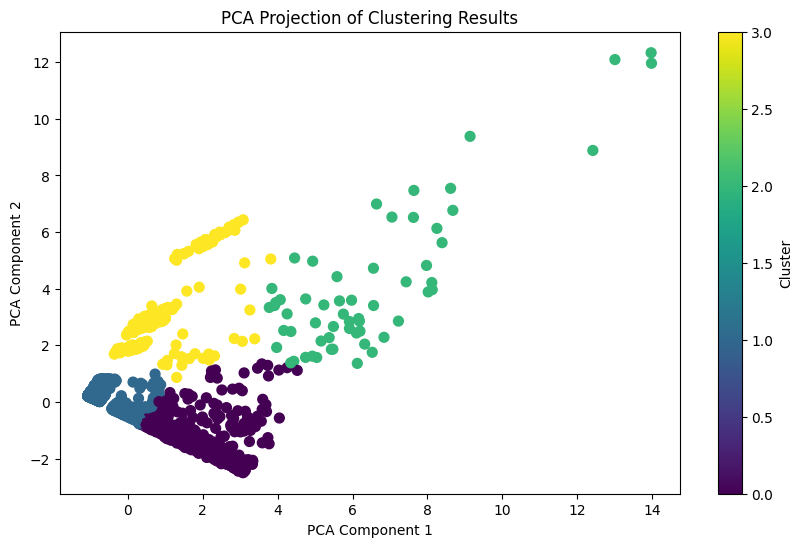

In [29]:
# Menggunakan PCA untuk mengurangi dimensi data menjadi 2D
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Visualisasi scatter plot dengan hasil clustering
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_encoded['Cluster'], cmap='viridis', s=50)
plt.colorbar(label='Cluster')
plt.title('PCA Projection of Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

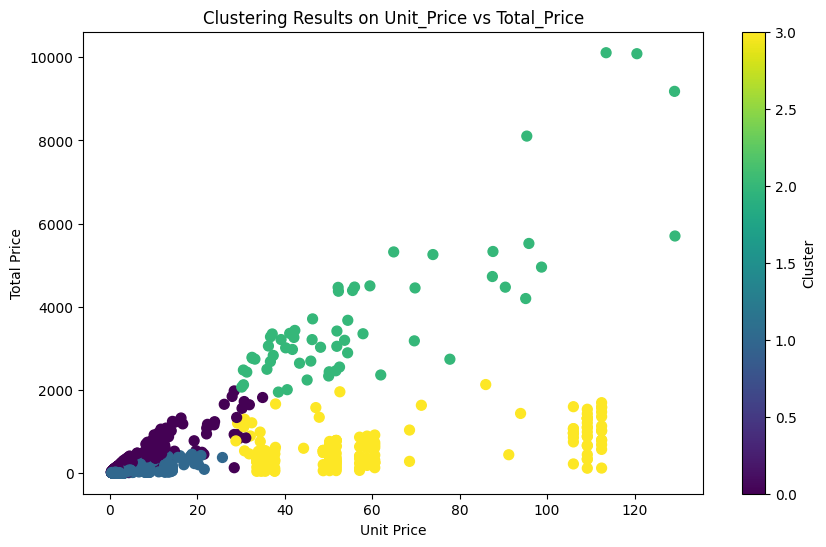

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Unit_Price'], df['Total_Price'], c=df_encoded['Cluster'], cmap='viridis', s=50)
plt.colorbar(label='Cluster')
plt.title('Clustering Results on Unit_Price vs Total_Price')
plt.xlabel('Unit Price')
plt.ylabel('Total Price')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [31]:
# Menambahkan hasil clustering (label cluster) ke dalam DataFrame yang sudah distandarisasi
df_scaled['Cluster_KMeans'] = kmeans.labels_

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [32]:
# Melakukan inverse transform pada data yang distandarisasi
df_scaled_inv = scaler.inverse_transform(df_scaled[num_features])
df_scaled_inv = pd.DataFrame(df_scaled_inv, columns=num_features)

# Menambahkan hasil clustering ke dalam DataFrame yang sudah di-inverse
df_scaled_inv['Cluster_KMeans'] = kmeans.labels_

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [33]:
# Menghitung rata-rata setiap fitur untuk tiap cluster
cluster_summary = df_scaled_inv.groupby('Cluster_KMeans')[num_features].mean()
print("Rata-rata fitur per cluster (KMeans):")
cluster_summary

# Lihat rata-rata fitur untuk setiap cluster
cluster_summary = df_encoded.groupby('Cluster')[num_features].mean()
print(cluster_summary)

Rata-rata fitur per cluster (KMeans):
         Unit_Price   Quantity  Discount  Total_Price
Cluster                                              
0          3.051531  62.667752  0.095765   166.956048
1          2.318017   9.070219  0.006916    21.030854
2         57.739831  74.915254  0.100000  3776.269831
3         59.120645  10.209677  0.006989   569.117581


# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
- **Rata-rata Unit_Price**: 3.05  
- **Rata-rata Quantity**: 62.67  
- **Rata-rata Discount**: 0.096  
- **Rata-rata Total_Price**: 166.96  
- **Analisis**: Cluster ini berisi produk dengan harga unit yang relatif rendah dan volume penjualan yang cukup tinggi. Produk dalam cluster ini kemungkinan besar lebih terjangkau dan banyak dibeli oleh konsumen yang sensitif terhadap harga. Mereka cenderung membeli dalam jumlah sedang, dan diskon yang diberikan cukup kecil. Produk ini bisa jadi mencakup barang sehari-hari yang banyak dibeli secara rutin oleh konsumen.

## Cluster 1:
- **Rata-rata Unit_Price**: 2.32  
- **Rata-rata Quantity**: 9.07  
- **Rata-rata Discount**: 0.007  
- **Rata-rata Total_Price**: 21.03  
- **Analisis**: Cluster ini berisi produk dengan harga unit yang rendah dan volume penjualan yang sangat rendah. Produk dalam cluster ini hampir tidak diberikan diskon, yang mengindikasikan bahwa produk tersebut kurang diminati oleh pasar. Penjualan yang rendah bisa menunjukkan bahwa produk ini memiliki target pasar yang lebih terbatas atau mungkin kurang populer di pasar secara keseluruhan.

## Cluster 2:
- **Rata-rata Unit_Price**: 57.74  
- **Rata-rata Quantity**: 74.92  
- **Rata-rata Discount**: 0.1  
- **Rata-rata Total_Price**: 3776.27  
- **Analisis**: Cluster ini berisi produk dengan harga unit yang relatif tinggi dan volume penjualan yang juga tinggi. Produk di cluster ini kemungkinan besar adalah produk premium yang menarik bagi konsumen dengan daya beli yang lebih tinggi. Diskon yang lebih besar bisa menunjukkan bahwa produk ini sering dipromosikan atau diberikan potongan harga untuk menarik lebih banyak pelanggan. Produk-produk di sini mungkin lebih dicari oleh konsumen dengan anggaran lebih besar.

## Cluster 3:
- **Rata-rata Unit_Price**: 59.12  
- **Rata-rata Quantity**: 10.21  
- **Rata-rata Discount**: 0.007  
- **Rata-rata Total_Price**: 569.12  
- **Analisis**: Cluster ini berisi produk dengan harga unit yang sangat tinggi, tetapi volume penjualannya rendah. Meskipun produk ini memiliki harga premium, penjualannya tidak sebanyak produk dalam cluster lainnya. Diskon yang sangat rendah menunjukkan bahwa produk ini jarang mendapatkan promosi atau potongan harga. Produk-produk dalam cluster ini mungkin memiliki pasar yang sangat terbatas atau lebih eksklusif, menarik konsumen yang lebih selektif.

# Kesimpulan dan Logika Bisnis

- **Cluster 0** berisi produk dengan harga unit yang relatif rendah dan volume penjualan yang tinggi. Ini menunjukkan bahwa produk di **Cluster 0** kemungkinan lebih terjangkau dan diminati oleh konsumen yang sensitif terhadap harga, serta memiliki pasar yang lebih luas. Produk-produk ini mungkin cocok untuk konsumen yang mencari barang-barang sehari-hari atau produk ekonomis.
  
- **Cluster 1** berisi produk dengan harga unit rendah, namun penjualannya sangat rendah. Produk-produk ini mungkin memiliki target pasar yang lebih terbatas atau tidak terlalu populer, yang bisa menjelaskan mengapa volume penjualannya kecil. Selain itu, hampir tidak ada diskon yang diberikan pada produk ini, menunjukkan bahwa produk ini mungkin kurang menarik bagi konsumen atau belum dipromosikan dengan baik.

- **Cluster 2** berisi produk dengan harga unit yang tinggi dan volume penjualan yang cukup besar. Produk di **Cluster 2** ini kemungkinan termasuk dalam kategori premium dan menarik bagi konsumen dengan daya beli lebih tinggi. Dengan adanya diskon yang lebih besar, produk ini mungkin sering dipromosikan untuk menarik lebih banyak pembeli. Produk dalam **Cluster 2** dapat dilihat sebagai produk unggulan yang memiliki performa baik di pasar.

- **Cluster 3** berisi produk dengan harga unit yang sangat tinggi, namun volume penjualannya lebih rendah. Ini menunjukkan bahwa produk di **Cluster 3** memiliki pasar yang lebih eksklusif dan terbatas. Diskon yang rendah mengindikasikan bahwa produk ini mungkin jarang dipromosikan atau tidak memerlukan promosi besar karena sudah memiliki basis pelanggan yang spesifik dan selektif.

## Apakah hasil clustering sesuai ekspektasi?

Hasil clustering sesuai dengan ekspektasi. Produk dengan harga yang lebih rendah (Cluster 0 dan 1) cenderung memiliki volume penjualan yang lebih besar, sementara produk dengan harga yang lebih tinggi (Cluster 2 dan 3) memiliki penjualan yang lebih rendah tetapi total harga yang lebih tinggi. Ini mencerminkan bahwa harga mempengaruhi volume penjualan, dengan produk premium memiliki pasar lebih terbatas dan lebih banyak dibeli oleh konsumen dengan daya beli yang kuat.

## Apakah ada pola yang bisa dimanfaatkan?

1. **Pemasaran dan Promosi**: 
   - Produk dalam **Cluster 2**, meskipun memiliki harga tinggi, menunjukkan penjualan yang besar. Oleh karena itu, produk ini bisa dimanfaatkan lebih banyak untuk promosi dan diskon guna meningkatkan volume penjualan lebih lanjut, atau bisa dipasarkan ke konsumen yang mencari produk premium dengan lebih banyak potongan harga.
   
2. **Segmentasi Pasar**: 
   - **Cluster 0** dan **Cluster 1** bisa ditargetkan pada konsumen dengan anggaran terbatas atau yang sensitif terhadap harga. Produk di **Cluster 0** bisa dipromosikan dengan strategi yang menekankan harga terjangkau, sementara produk di **Cluster 1** bisa mendapat perhatian lebih melalui promosi atau pengembangan pasar yang lebih terfokus.
   - **Cluster 2** dan **Cluster 3** lebih cocok untuk pasar premium dengan kemampuan membeli produk lebih mahal. **Cluster 2** lebih cocok untuk konsumen yang cenderung mencari kualitas dengan diskon lebih besar, sedangkan **Cluster 3** cocok untuk pasar yang sangat selektif dan lebih eksklusif.

3. **Strategi Penetapan Harga**: 
   - Produk di **Cluster 2** dan **Cluster 3** yang memiliki harga tinggi dapat diposisikan sebagai produk unggulan atau premium. Untuk **Cluster 2**, meningkatkan promosi dan diskon bisa meningkatkan volume penjualan, sedangkan untuk **Cluster 3**, menjaga eksklusivitas produk bisa membantu mempertahankan citra premium dan menjaga pasar yang sangat spesifik.


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [34]:
df_encoded.to_csv('Dataset_inisiasi.csv', index=False)